## Непараметрические критерии

In [5]:
import numpy as np
import pandas as pd
import itertools
from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Терапия при анорексии

In [2]:
weight_data = pd.read_csv("data/weight.txt", sep="\t", header=0)

In [3]:
weight_data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


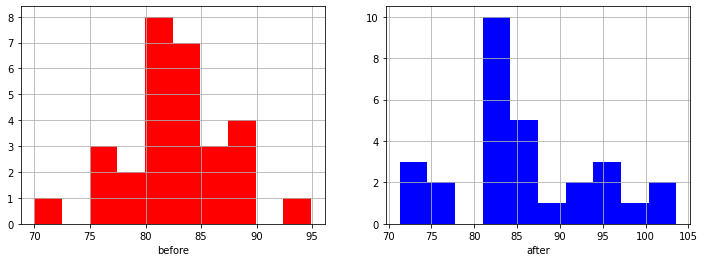

In [7]:
pylab.figure(figsize=(12, 4))

pylab.subplot(1, 2, 1)
pylab.grid()
pylab.hist(weight_data.Before, color='r')
pylab.xlabel("before")

pylab.subplot(1, 2, 2)
pylab.grid()
pylab.hist(weight_data.After, color='b')
pylab.xlabel("after")

pylab.show()

In [8]:
weight_data.describe()

,Before,After
count,29.000000,29.000000
mean,82.689655,85.696552
std,4.845495,8.351924
min,70.000000,71.300000
25%,80.400000,81.900000
50%,82.600000,83.900000
75%,85.000000,90.900000
max,94.900000,103.600000


In [9]:
zconfint(weight_data.Before), zconfint(weight_data.After)

((80.92610749911721, 84.45320284571041), (82.6568174981233, 88.7362859501525))

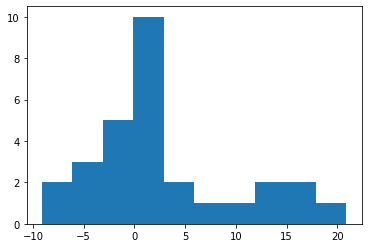

In [11]:
pylab.hist(weight_data.After - weight_data.Before);

#### Критерий знаков

In [12]:
sign_test(weight_data.After - weight_data.Before)

(3.5, 0.26493089646101)

#### Критерий знаковых рангов Вилкоксона

In [13]:
stats.wilcoxon(weight_data.After - weight_data.Before)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [14]:
stats.wilcoxon(weight_data.After, weight_data.Before)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

#### Перестановочный критерий

In [32]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum([x - mean for x in sample])
    return t_stat

def permutation_zero_distr_1sample(sample, mean, max_permutation=None):
    centered_sample = [x - mean for x in sample]
    if max_permutation:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size=(max_permutation, len(sample))) - 1])
    else:
        signs_array = itertools.product([-1, 1], repeat=len(sample))
    distr = [sum(centered_sample * np.array(sign)) for sign in signs_array]
    return distr

def permutation_test(sample, mean, max_permutation=None, alternative="two-sided"):
    if alternative not in ("two-sided", "less", "greater"):
        raise ValueError("alternative not recognized\nshould be 'two-sided', 'less' or 'greater'")
    t_stat = permutation_t_stat_1sample(sample, mean)
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutation)
    if alternative == 'two-sided':
        return sum([1 if abs(x) >= abs(t_stat) else 0 for x in zero_distr]) / len(zero_distr)
    if alternative == 'less':
        return sum([1 if x <= t_stat else 0 for x in zero_distr]) / len(zero_distr)
    if alternative == 'greater':
        return sum([1 if x >= t_stat else 0 for x in zero_distr]) / len(zero_distr)

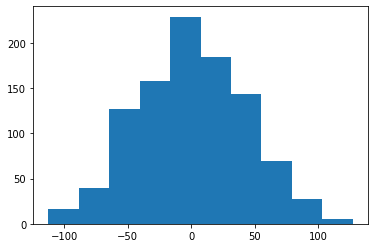

In [33]:
pylab.hist(permutation_zero_distr_1sample(weight_data.After - weight_data.Before, 0, max_permutation=1000));

In [36]:
permutation_test(weight_data.After - weight_data.Before, 0, max_permutation=1000)

0.026

In [38]:
permutation_test(weight_data.After - weight_data.Before, 0, max_permutation=50000)

0.03338066761335227